# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')

### 1.

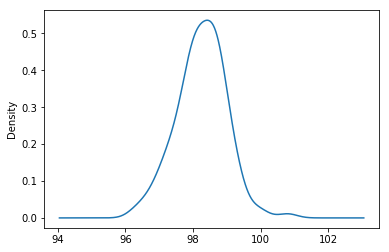

In [22]:
df.temperature.plot(kind='kde')

The distribution appears to be normal.

### 2.

In [23]:
print(f'Sample size is {len(df.temperature)}')

Sample size is 130


### 3.

H0: The normal mean body temperature is not different from 98.6 degrees F.

H1: There is a non-zero difference between the true mean body temperature and 98.6 degrees F.

#### One-sample test:

In [24]:
mean = df.temperature.mean()
mean

98.24923076923078

In [25]:
std = df.temperature.std()
std

0.7331831580389454

In [26]:
sem = std / (len(df.temperature)**(1/2.0))
sem

0.06430441683789101

In [27]:
z = (mean - 98.6) / sem
z

-5.454823292364079

The z-score is greater than 2.58, thus the null hypothesis should be rejected at a 1% significance level.

#### Two-sample test:

Not sure what this means in this context.

### 4.

In [28]:
# 99% confidence interval
left_side = mean - 2.58 * sem
right_side = mean + 2.58 * sem

In [29]:
print(f'99% confident the true mean is between {left_side} and {right_side}.')

99% confident the true mean is between 98.08332537378902 and 98.41513616467253.


A normal temperature, according to this 99% confidence interval, is between 98.08 degrees and 98.4 degrees.

An abnormal temperature, then, would be anything outside of this interval.

### 5.

H0: There is no difference between male and female mean body temperatures.

H1: There is a non-zero difference between male and female mean body temperatures.

In [30]:
male = df[df.gender == 'M']
female = df[df.gender == 'F']

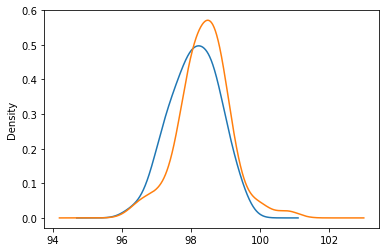

In [31]:
male.temperature.plot(kind='kde')
female.temperature.plot(kind='kde')

In [32]:
male_mean = male.temperature.mean()
male_mean

98.1046153846154

In [33]:
female_mean = female.temperature.mean()
female_mean

98.39384615384613

In [34]:
diff_mean = female_mean - male_mean
diff_mean

0.289230769230727

In [35]:
diff_var = ((female.temperature.std()**2)/len(female.temperature) + (male.temperature.std()**2)/len(male.temperature))**(1/2.0)
diff_var

0.12655395041982642

In [36]:
# 1% significance test
diff_var * 2.58

0.32650919208315216

In [37]:
# 5% significance test
diff_var * 1.96

0.2480457428228598

The null hypothesis should not be rejected at either 5% or 1% significance level.

### Conclusion

According to the dataset we have here, the traditionally accepted mean normal temperature of 98.6 degrees is not statistically correct. Even at a 1% significance level, the null hypothesis that the mean temperature is 98.6 degrees is rejected.

In addition, the null hypothesis that there is no difference between male and female mean temperatures should not be rejected at either a 5% or 1% significance level. Therefore, we cannot be confident there is a difference in mean body temperature between the two sexes.